# Упражнение 2

In [1]:
from micrograd.engine import Value
from graphviz import Digraph
import math

In [2]:
def exp(self: Value):
    out = Value(math.exp(self.data), (self,), 'exp')

    def _backward():
        self.grad += out.data * out.grad
    out._backward = _backward

    return out
    
Value.exp = exp

def e(v: Value):
    return v.exp()

In [3]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})  # , node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label="{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

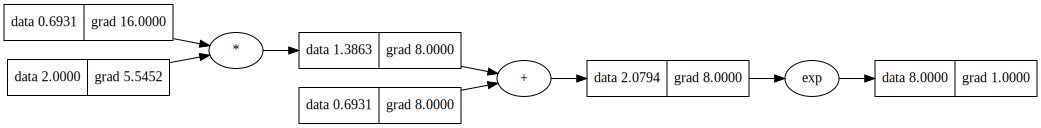

In [4]:
x = Value(math.log(2))
y = e(2 * x + math.log(2))
y.backward()
draw_dot(y)